#### Primero importamos las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## **1.- Exploración y Análisis de Datos**

Este conjunto de datos se encuentra en esta pagina:
https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [3]:
df = pd.read_csv('../datasets/housing.csv')

In [3]:
df2 = df.copy()

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


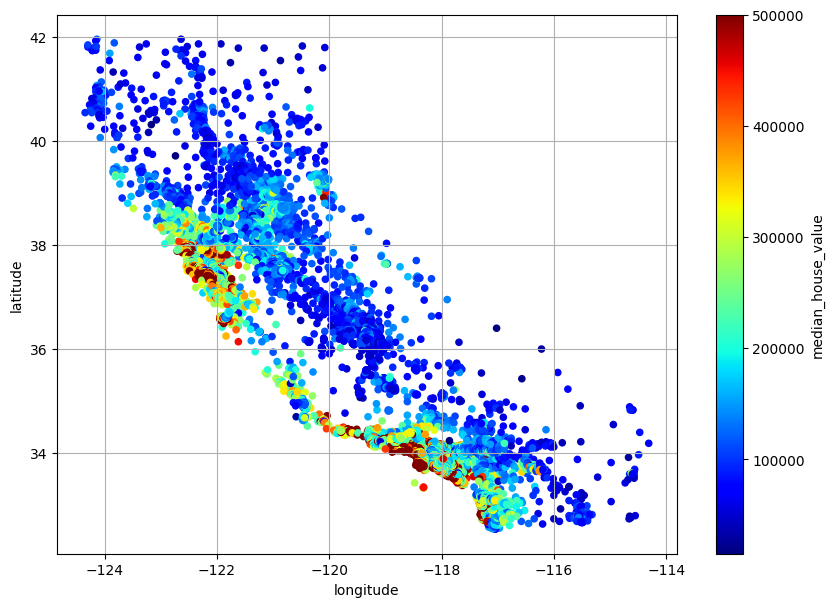

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True,  c="median_house_value", cmap='jet', figsize=(10, 7)) 
plt.show()  

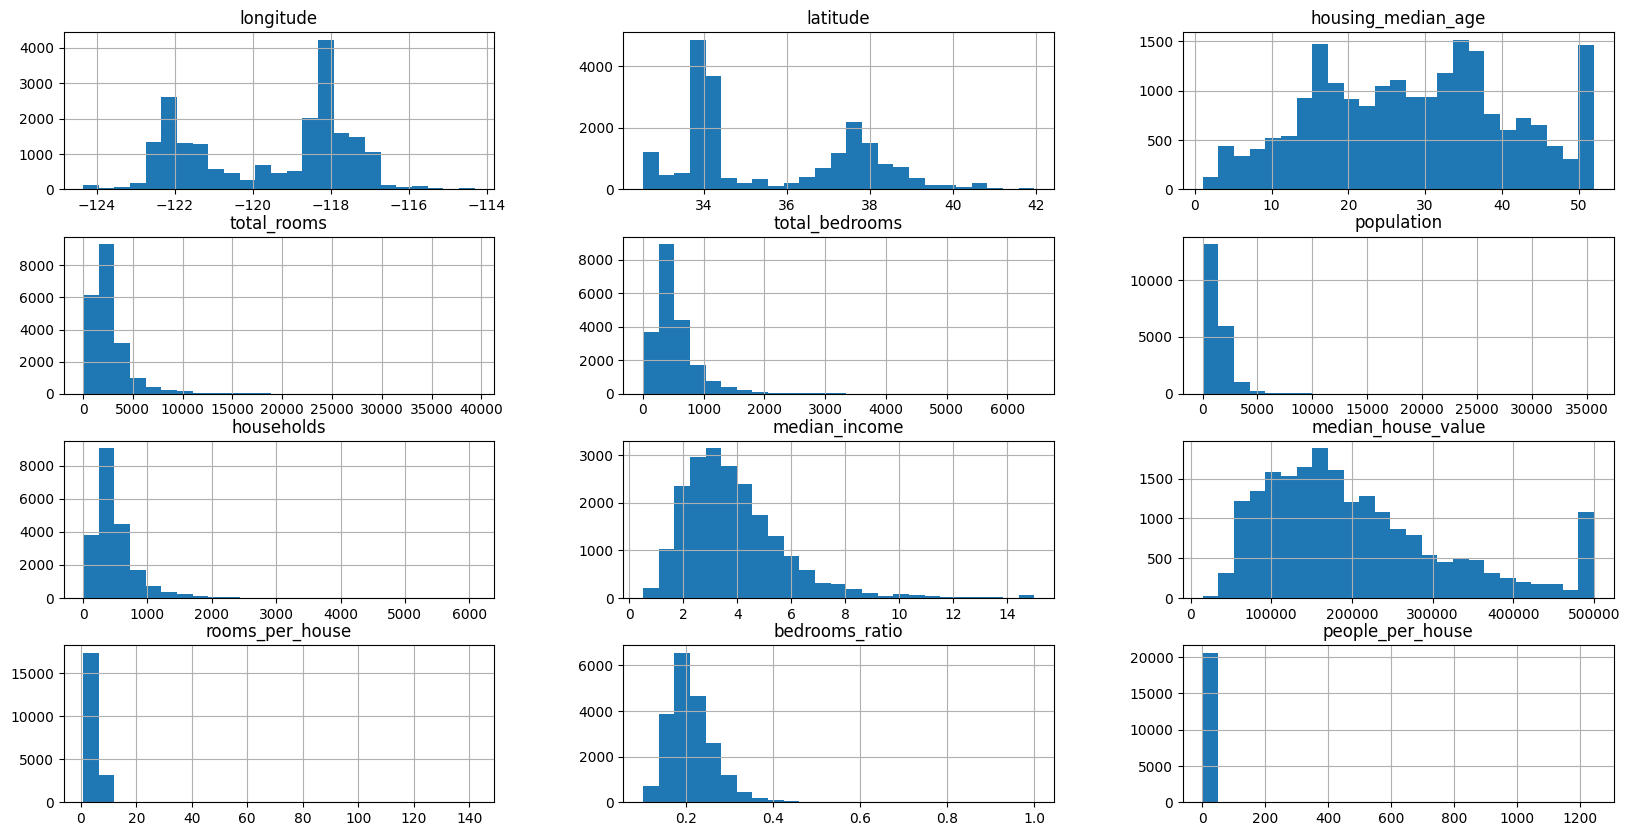

In [27]:
df.hist(bins=25,figsize=(20,10));

In [11]:
df_co = df.drop('ocean_proximity', axis=1)

corr_matrix = df_co.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

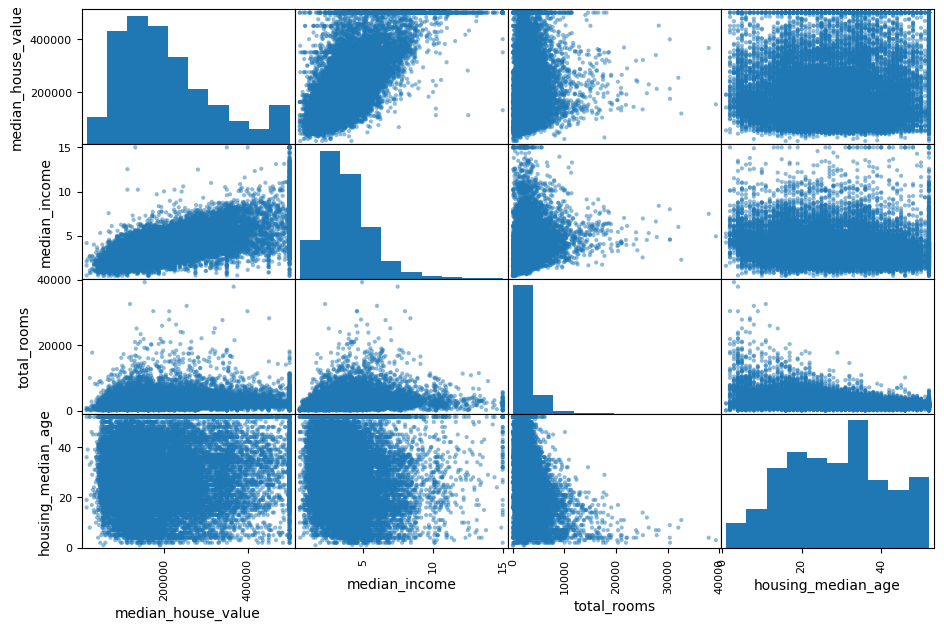

In [12]:
from pandas.plotting import scatter_matrix  

attributes = ["median_house_value", "median_income", "total_rooms",  "housing_median_age"] 
scatter_matrix(df[attributes], figsize=(11, 7))  
plt.show()  

<Axes: xlabel='median_income', ylabel='median_house_value'>

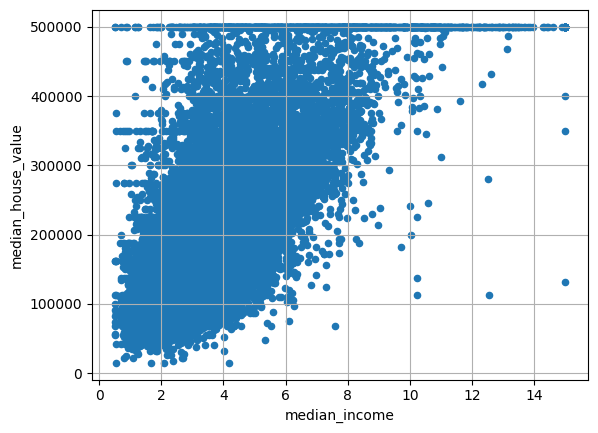

In [13]:
df.plot(kind='scatter', x='median_income', y='median_house_value', grid=True)

In [14]:
df["rooms_per_house"] = df["total_rooms"]/ df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"]/ df["total_rooms"]
df["people_per_house"] = df["population"]/ df["households"]  

In [15]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [16]:
df_co = df.drop('ocean_proximity', axis=1)

corr_matrix = df_co.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

## 2.- Preprocesamiento de datos

In [17]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
rooms_per_house         0
bedrooms_ratio        207
people_per_house        0
dtype: int64

In [18]:
df.shape

(20640, 13)

In [19]:
# Seleccionar características (features) y objetivo (target)
x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [20]:
# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Definimos las columnas numéricas y categóricas para cada
numeric_features = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Creamos transformers para imputación y escala
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creamos transformer para codificación de variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creamos un preprocesador que aplique los transformers apropiados a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creamos el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [22]:
x_train_prep = pipeline.fit_transform(x_train)
x_test_prep = pipeline.transform(x_test)

In [23]:
x_train = pd.DataFrame(x_train_prep, columns=list(pd.get_dummies(x_train)), index=x_train.index)
x_test = pd.DataFrame(x_test_prep, columns=list(pd.get_dummies(x_test)), index=x_test.index)

## 3.- Entrenamiento

In [24]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(x_train, y_train)

LinearRegression()

## 4.- Evaluación

In [25]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

Error cuadrático medio en el conjunto de prueba: 4777727123.0504675


In [26]:
# Calcular los residuos
residuos = y_test - y_pred

# Crear un histograma de residuos con Plotly
fig = px.histogram(x=residuos, nbins=80, title='Histograma de Residuos')
fig.update_layout(xaxis_title='Residuos', yaxis_title='Frecuencia')
fig.show()

NameError: name 'px' is not defined

In [ ]:
# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame({'Precios Reales': y_test, 'Predicciones': y_pred})

# Scatter plot con línea de regresión
fig = px.scatter(resultados_df, x='Precios Reales', y='Predicciones', title='Regresión Lineal - California Housing Prices')
fig.add_trace(px.line(x=resultados_df['Precios Reales'], y=resultados_df['Precios Reales']).data[0])  # Línea de Regresión

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Precios Reales',
    yaxis_title='Predicciones',
    legend_title='Línea de Regresión',
    showlegend=True,
)

# Mostrar el gráfico
fig.show()
